In [38]:
# Name Surname, email: Gonul Ayci, gonul.ayci@boun.edu.tr
# Location, Date: Hipo, Nov. 28, 2017
# Description: This document is prepared for Python Hour 

# Jupyter Notebook 
http://jupyter.org/ <br>
Examples: https://nbviewer.jupyter.org/ <br>
A list of available kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels

In [4]:
!date

Tue Nov 28 18:10:58 +03 2017


In [5]:
!pwd

/Users/brain/Desktop/events/pythonHour


In [6]:
%mkdir deneme
%cd deneme

/Users/brain/Desktop/events/pythonHour/deneme


In [7]:
%cd ..

/Users/brain/Desktop/events/pythonHour


In [8]:
%%writefile hello.py
print "Hello everyone!"

Writing hello.py


In [9]:
%run hello.py

Hello everyone!


In [10]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [11]:
%%html

<html>
<body>

<h1 style="color:DodgerBlue;"> This is 32th Python Hour 🐍💻 </h1>

</body>
</html>

In [12]:
import sys
print sys.version_info

sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)


# description and setup

You need to enter your API credentials to the key list. https://apps.twitter.com/

In [13]:
import json #responses will be in JSON format
import oauth2 

In [14]:
Consumer_Key = "xxx"
Consumer_Secret = "xxx"

Access_Token = "xxx"
Access_Token_Secret = "xxx"

consumer = oauth2.Consumer(key=Consumer_Key, secret=Consumer_Secret)
access_token = oauth2.Token(key=Access_Token, secret=Access_Token_Secret)
client = oauth2.Client(consumer, access_token)

# get profile

Enter the screen_name of the user whose profile will be fetched. https://dev.twitter.com/rest/reference/get/users/lookup

In [15]:
import urllib, cStringIO
from PIL import Image
from IPython import display

In [16]:
usernames = ["gvanrossum", "pyistanbul", "hipolabs"]

In [17]:
request = "https://api.twitter.com/1.1/users/lookup.json?screen_name=" + ",".join(usernames)
response,data = client.request(request)

# show profile information

You can specify which info you need to the info list. 

In [18]:
def show_user_profile(user_data):
    info = ["profile_image_url", "name", "location", "created_at", "lang", "protected", "description", "time_zone", "followers_count"]
    for i in info:
        if i == "profile_image_url":
            URL = user_data[i]
            file = cStringIO.StringIO(urllib.urlopen(URL).read())
            img = Image.open(file)
            display.display(img)
        else:
            print i , ":" ,  user_data[i]

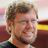

name : Guido van Rossum
location : San Francisco Bay Area
created_at : Mon Aug 11 04:02:18 +0000 2008
lang : en
protected : False
description : Python BDFL. Working at Dropbox. The 'van' has no capital letter!
time_zone : Pacific Time (US & Canada)
followers_count : 103307


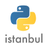

name : pyistanbul
location : Istanbul
created_at : Sat Nov 10 23:27:29 +0000 2012
lang : en
protected : False
description : İstanbul Python Kullanıcıları Grubu
time_zone : Istanbul
followers_count : 656


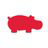

name : Hipo
location : Toronto & Istanbul
created_at : Mon Feb 13 07:37:13 +0000 2012
lang : en
protected : False
description : Ideation - Design - Development
for Web & Mobile
time_zone : Istanbul
followers_count : 981


In [19]:
for ix,user in enumerate(usernames):
    show_user_profile(json.loads(data)[ix])

# get followers and show a full profile

https://dev.twitter.com/rest/reference/get/followers/ids <br>
https://dev.twitter.com/rest/reference/get/users/show

In [20]:
username = "pyistanbul"

In [21]:
request = "https://api.twitter.com/1.1/followers/ids.json?screen_name=" + username + "&skip_status=true&include_user_entities=false&count=100"
response,data = client.request(request)

In [22]:
print json.dumps(response, indent=4,sort_keys=True)

{
    "-content-encoding": "gzip", 
    "cache-control": "no-cache, no-store, must-revalidate, pre-check=0, post-check=0", 
    "content-disposition": "attachment; filename=json.json", 
    "content-length": "1420", 
    "content-location": "https://api.twitter.com/1.1/followers/ids.json?count=100&oauth_body_hash=2jmj7l5rSw0yVb%2FvlWAYkK%2FYBwk%3D&screen_name=pyistanbul&oauth_nonce=4707365&oauth_timestamp=1511881915&oauth_consumer_key=K6Rk0fGEFB6gtKYuzaBnTMT9T&oauth_signature_method=HMAC-SHA1&oauth_version=1.0&oauth_token=455237513-3NZrkuCQMOldFRhuC53r8WoKDY7T5MxjqYyWgzHb&skip_status=true&oauth_signature=GVEUWOGPXFWSLTAmj4%2BOeSmCJTE%3D&include_user_entities=false", 
    "content-type": "application/json;charset=utf-8", 
    "date": "Tue, 28 Nov 2017 15:11:56 GMT", 
    "expires": "Tue, 31 Mar 1981 05:00:00 GMT", 
    "last-modified": "Tue, 28 Nov 2017 15:11:56 GMT", 
    "pragma": "no-cache", 
    "server": "tsa_f", 
    "set-cookie": "personalization_id=\"v1_cmZdxnOUE0dWXWbk6V/mbA==\

In [23]:
followers = json.loads(data)["ids"]
followers

[88048883,
 254234074,
 916796365740609537,
 72249952,
 782577184284282880,
 2323929699,
 95650956,
 766757236752416768,
 65038909,
 95736749,
 733773861360181248,
 46094864,
 790614501498511361,
 74426871,
 2445151619,
 263553615,
 203172470,
 900286412683173888,
 3141600945,
 2185092368,
 4690998878,
 2878107841,
 832863623433351168,
 862606624783052800,
 2347184374,
 18910773,
 731625012482977792,
 3114804478,
 197107924,
 2389880347,
 171451499,
 752937877089165313,
 857819347,
 85521830,
 1160978539,
 89775164,
 1136629272,
 897184513352183809,
 2949783730,
 351028549,
 357816569,
 1561023530,
 440862669,
 839440243958906880,
 913647601613930496,
 909045582286778368,
 1057128600,
 15017983,
 825841751839629314,
 2988045075,
 907228048294125568,
 1619661169,
 209573845,
 1392991393,
 805533067691642880,
 802923595,
 2316165919,
 874894599852052480,
 902078327816638464,
 2316360502,
 897836982356893702,
 1387840135,
 91670333,
 187880356,
 35719236,
 106408332,
 1944395383,
 3492583

In [24]:
request = '{url1}{user_id}'.format(url1="https://api.twitter.com/1.1/users/show.json?user_id=", user_id=followers[1])
response, data = client.request(request)
shows = json.loads(data)
shows

{u'contributors_enabled': False,
 u'created_at': u'Fri Feb 18 22:04:32 +0000 2011',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'insanlar\u0131nveremedi\u011fihuzuruverenkitaplarvar!',
 u'entities': {u'description': {u'urls': []}},
 u'favourites_count': 23,
 u'follow_request_sent': False,
 u'followers_count': 31,
 u'following': False,
 u'friends_count': 153,
 u'geo_enabled': False,
 u'has_extended_profile': False,
 u'id': 254234074,
 u'id_str': u'254234074',
 u'is_translation_enabled': False,
 u'is_translator': False,
 u'lang': u'tr',
 u'listed_count': 0,
 u'location': u'T\xfcrkiye',
 u'name': u"N'olca\u011f\u0131belirsiz...",
 u'notifications': False,
 u'profile_background_color': u'8B542B',
 u'profile_background_image_url': u'http://pbs.twimg.com/profile_background_images/378800000029657215/405d2c330ee03d02114fedf39834533f.jpeg',
 u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/378800000029657215/405d2c330ee

# get data from MongoDB

In [25]:
from pymongo import MongoClient

In [26]:
mongo_client = MongoClient('localhost', 27017)
db = mongo_client['graph_db']
graph_profile_collection = db.graph_profile_collection 

# create table using pandas

In [27]:
import pandas as pd

In [28]:
profile = pd.DataFrame(list(graph_profile_collection.find()))
profile

,_id,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,...,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,59c92ca37e676e031155ac4a,False,Sun Sep 03 01:31:02 +0000 2017,True,False,"We are your premiere hub for 3D printing, prot...",{u'description': {u'urls': []}},3,False,36,...,True,False,StormeTech3D,"{u'contributors': None, u'truncated': False, u...",8,None,none,None,NaN,False
1,59c92ca47e676e031155ac4b,False,Sat Jul 08 09:25:33 +0000 2017,True,False,Tons of #litter + 380 MILLION #volunteers + Se...,{u'url': {u'urls': [{u'url': u'https://t.co/QX...,599,False,404,...,True,False,WorldCleanupDay,"{u'contributors': None, u'truncated': False, u...",757,None,none,https://t.co/QXYzbzrAle,NaN,False
2,59c92ca47e676e031155ac4c,False,Thu May 28 10:00:35 +0000 2009,False,False,I am Teacher (math-physics) and Civil Engineer...,{u'url': {u'urls': [{u'url': u'http://t.co/nqo...,4915,False,7752,...,True,False,SardegnaNews,"{u'contributors': None, u'truncated': False, u...",149043,Rome,none,http://t.co/nqoaP4vDVb,7200.0,False
3,59c92ca47e676e031155ac4d,False,Mon May 28 21:25:51 +0000 2012,False,False,Full service marketing agency. #KCCO #crowdfun...,{u'url': {u'urls': [{u'url': u'https://t.co/ey...,771,False,11038,...,True,False,ATERO_Marketing,"{u'contributors': None, u'truncated': False, u...",35379,America/Los_Angeles,none,https://t.co/eyCiJAPOgj,-25200.0,False
4,59c92ca47e676e031155ac4e,False,Sun Mar 13 10:07:59 +0000 2016,False,False,Tom's 3D printing Reviews and Guides\n\nAuthor...,{u'url': {u'urls': [{u'url': u'https://t.co/vp...,2167,False,12056,...,False,False,toms3dp,"{u'contributors': None, u'truncated': True, u'...",3243,Paris,none,https://t.co/vp0PE0oDgf,7200.0,False
5,59c92ca47e676e031155ac4f,False,Tue Apr 07 14:52:08 +0000 2009,False,False,"Saving interesting links here, to read one day...",{u'url': {u'urls': [{u'url': u'https://t.co/uq...,13443,False,6728,...,True,False,Ann_Marie1,"{u'contributors': None, u'truncated': False, u...",180104,International Date Line West,none,https://t.co/uqbH1xkNLN,-39600.0,False
6,59c92ca47e676e031155ac50,False,Mon Mar 29 18:35:43 +0000 2010,False,False,Giornalista #Sole24Ore appassionata di #sosten...,{u'url': {u'urls': [{u'url': u'https://t.co/n9...,3338,False,8903,...,True,False,lauralaposta,"{u'contributors': None, u'truncated': False, u...",3897,Europe/Rome,none,https://t.co/n9eM2DeF7x,7200.0,False
7,59c92ca47e676e031155ac51,False,Thu Apr 05 01:01:38 +0000 2007,False,False,"San Diego based intellectual property lawyer, ...",{u'url': {u'urls': [{u'url': u'http://t.co/Asz...,1322,False,11052,...,True,False,MikeEddy,"{u'contributors': None, u'truncated': False, u...",457,Pacific Time (US & Canada),none,http://t.co/AszYoFq9Ky,-25200.0,False
8,59c92ca47e676e031155ac52,False,Sat Sep 20 18:42:23 +0000 2008,False,False,The DAZ 3D Software and Genesis figures give y...,{u'url': {u'urls': [{u'url': u'https://t.co/gx...,50,False,9821,...,False,False,daz3d,"{u'contributors': None, u'truncated': False, u...",1300,Mountain Time (US & Canada),none,https://t.co/gx2DET1SIU,-21600.0,False
9,59c92ca47e676e031155ac53,False,Fri Apr 25 05:58:47 +0000 2008,False,False,The best way to predict the future is to inven...,{u'url': {u'urls': [{u'url': u'https://t.co/Dj...,3582,False,9628,...,True,False,davidedattoli,"{u'contributors': None, u'truncated': False, u...",17465,Rome,none,https://t.co/Dj9gtxXdM0,7200.0,False


# get locations from Italy

In [29]:
profile['location'].value_counts().to_frame()

,location
"Los Angeles, California",2
We are truly global!,2
Milan,2
San Francisco Bay Area,2
Milano,2
California,2
Thailand & South East Asia,1
"Salinas, CA via CO",1
Brescia ✈ Milan ✈ New York,1
Earth Terra Gaia,1


In [30]:
f = open('cities_italy.txt', 'r')
location_list = f.read().split('\n')

profile_cities_list = []

for location in location_list:
    profile_cities_list.append(profile[profile.location == location])
profile_cities = pd.concat(profile_cities_list)

profile_cities

/Users/brain/anaconda/lib/python2.7/site-packages/pandas/core/ops.py:745: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  result = lib.scalar_compare(x, y, op)


,_id,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,...,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified
15,59c92ca47e676e031155ac59,False,Thu Dec 04 16:33:06 +0000 2014,False,False,The Global Food Innovation Summit #FoodTech #A...,{u'url': {u'urls': [{u'url': u'https://t.co/wn...,31811,False,12003,...,True,False,SEEDSandCHIPS,"{u'contributors': None, u'truncated': True, u'...",27866,None,none,https://t.co/wnXjoAuCXs,NaN,True
58,59c92ca47e676e031155ac84,False,Fri Oct 23 09:18:33 +0000 2009,False,False,"Nel 2016 ho appeso la penna al chiodo, dopo 38...",{u'description': {u'urls': []}},13305,False,8797,...,True,False,paolabottelli,"{u'contributors': None, u'truncated': False, u...",21689,Greenland,none,None,-7200.0,False


# make clickable hyperlink to Twitter Url

In [31]:
from IPython.display import HTML

In [32]:
twitter_url = profile_cities['screen_name'].apply(lambda x: '<a href="http://twitter.com/{0}">{0}</a>'.format(x))
profile_cities = profile_cities.assign(twitter_url=twitter_url.values)
html_format = HTML(profile_cities.to_html(escape=False))
html_format

,_id,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,has_extended_profile,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified,twitter_url
15,59c92ca47e676e031155ac59,False,Thu Dec 04 16:33:06 +0000 2014,False,False,The Global Food Innovation Summit #FoodTech #A...,{u'url': {u'urls': [{u'url': u'https://t.co/wn...,31811,False,12003,False,2223,True,False,2905258265,2905258265,False,False,it,1137,Milan,Seeds&Chips,False,D1B53E,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/29052582...,http://pbs.twimg.com/profile_images/8883874841...,https://pbs.twimg.com/profile_images/888387484...,272C37,C0DEED,DDEEF6,333333,True,False,SEEDSandCHIPS,"{u'contributors': None, u'truncated': True, u'...",27866,None,none,https://t.co/wnXjoAuCXs,NaN,True,SEE...
58,59c92ca47e676e031155ac84,False,Fri Oct 23 09:18:33 +0000 2009,False,False,"Nel 2016 ho appeso la penna al chiodo, dopo 38...",{u'description': {u'urls': []}},13305,False,8797,False,3354,False,False,84545911,84545911,False,False,en,209,Milan,paolabottelli,False,C0DEED,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,NaN,http://pbs.twimg.com/profile_images/3788000005...,https://pbs.twimg.com/profile_images/378800000...,0084B4,C0DEED,DDEEF6,333333,True,False,paolabottelli,"{u'contributors': None, u'truncated': False, u...",21689,Greenland,none,None,-7200.0,False,pao...


# list elements according to some columns

In [33]:
profile.sort_values(by=['followers_count'], ascending=False)[['screen_name', 'followers_count']].tail(10)

,screen_name,followers_count
34,alolita,2152
21,daviddicastro11,1625
44,lucaM1966,1415
57,ramonsuarez_,1072
52,MatteoVillaYB,1036
18,umbpell,866
1,WorldCleanupDay,404
38,CleanApp,384
31,mizzjmaldonado,213
0,StormeTech3D,36


In [34]:
profile['location'] = profile['location'].str.lower()
profile[['screen_name','location']].head(10)

,screen_name,location
0,StormeTech3D,"fort atkinson, wi"
1,WorldCleanupDay,we are truly global!
2,SardegnaNews,olbia | sardegna | italy
3,ATERO_Marketing,sacramento
4,toms3dp,"munich, bavaria"
5,Ann_Marie1,i unfollow back too!
6,lauralaposta,milano
7,MikeEddy,"del mar, california"
8,daz3d,"salt lake city, utah"
9,davidedattoli,brescia ✈ milan ✈ new york


# map location (string) to (city, country)

In [35]:
location_list = []
locations = profile['location'].str.lower()

for index in range(len(profile['location'].head(10))):
    location_list.append(locations[index].encode('utf-8'))

print 'Location:', location_list[4]

Location: munich, bavaria


In [36]:
from geopy.geocoders import Nominatim

In [37]:
nom = Nominatim(timeout=None)
geo1 = nom.geocode(location_list[4], addressdetails=True)

print 'City: ', geo1.raw['address']['city'].encode('utf-8'), '\n', 'Country: ', geo1.raw['address']['country'].encode('utf-8')

City:  München 
Country:  Deutschland
